In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 25, 'legend.handlelength'  : 1.25})
plt.rcParams['image.cmap'] = 'RdBu_r'
%matplotlib inline

In [2]:
import pyqg

year = 24*60*60*360.
# Set up a model which will run for 20 years and start averaging after 10 years.
# There are lots of parameters that can be specified as keyword arguments
# but we are just using the defaults.
m = pyqg.QGModel(tmax=20*year, twrite=10000, tavestart=10*year)
# run it
m.run()

t=         7200000, tc=      1000: cfl=0.011713, ke=0.000000362
t=        14400000, tc=      2000: cfl=0.011725, ke=0.000000552
t=        21600000, tc=      3000: cfl=0.011693, ke=0.000000992
t=        28800000, tc=      4000: cfl=0.011725, ke=0.000002084
t=        36000000, tc=      5000: cfl=0.011789, ke=0.000004920
t=        43200000, tc=      6000: cfl=0.013580, ke=0.000012519
t=        50400000, tc=      7000: cfl=0.018013, ke=0.000033297
t=        57600000, tc=      8000: cfl=0.029408, ke=0.000090831
t=        64800000, tc=      9000: cfl=0.049361, ke=0.000240498
t=        72000000, tc=     10000: cfl=0.067622, ke=0.000332436
t=        79200000, tc=     11000: cfl=0.093516, ke=0.000437957
t=        86400000, tc=     12000: cfl=0.122330, ke=0.000458282
t=        93600000, tc=     13000: cfl=0.099811, ke=0.000430583
t=       100800000, tc=     14000: cfl=0.082300, ke=0.000435380
t=       108000000, tc=     15000: cfl=0.091139, ke=0.000450787
t=       115200000, tc=     16000: cfl=0

## Example of plots

## The QG potential vorticities in physical space

In [10]:
q1 = m.q[0] + m.Qy[0]*m.y
q2 = m.q[1] + m.Qy[1]*m.y

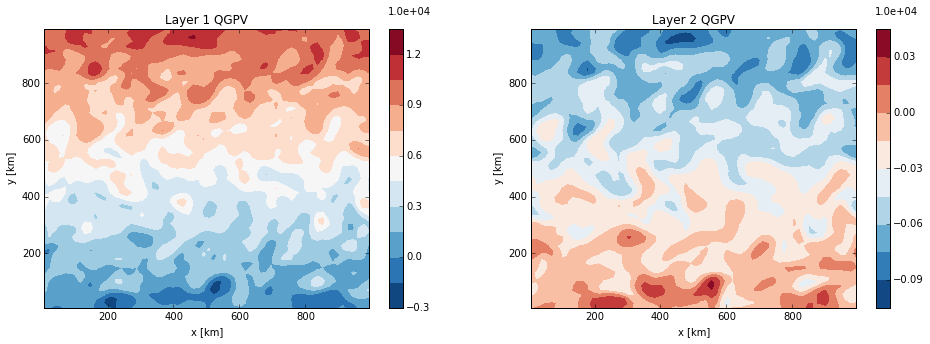

In [12]:
X, Y = m.x/1e3, m.y/1e3 # give units in km
pv_factor = 1.e4
factor_s = str('%1.1e') %pv_factor

fig = plt.figure(figsize=(16.,5.))
ax1 = fig.add_subplot(121)
cf1 = ax1.contourf(X, Y, pv_factor*q1, 12)
cb1 = fig.colorbar(cf1)
cb1.ax.text(.0,1.05,factor_s,rotation=0)
ax1.set_xlabel('x [km]')
ax1.set_ylabel('y [km]')
ax1.set_title('Layer 1 QGPV')
ax2 = fig.add_subplot(122)
cf2 = ax2.contourf(X, Y, pv_factor*q2, 12)
cb2 = fig.colorbar(cf2)
ax2.set_title('Layer 2 QGPV')
cb2.ax.text(.0,1.05,factor_s,rotation=0)
ax2.set_xlabel('x [km]')
ax2.set_ylabel('y [km]')

## KE spectra and Energy budget

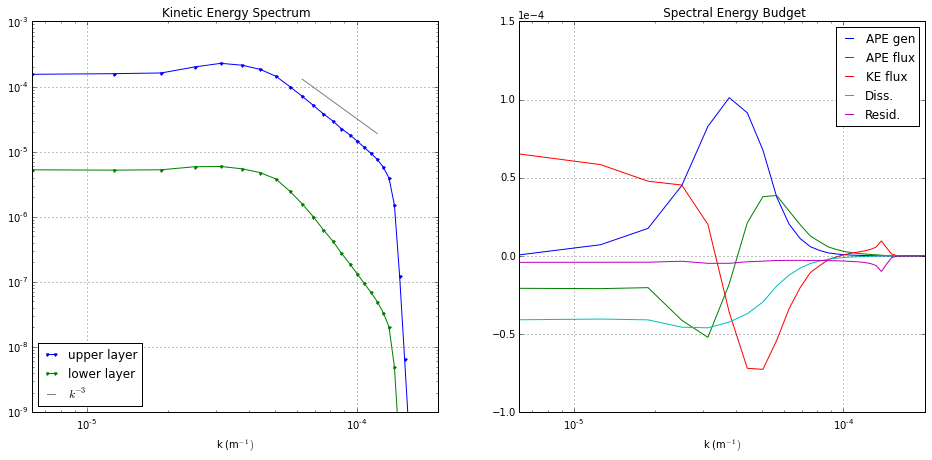

In [14]:
# some spectral plots
KE1spec = m.get_diagnostic('KEspec')[0].sum(axis=0)   # note that this is misleading for anisotrphic flows...
KE2spec = m.get_diagnostic('KEspec')[1].sum(axis=0)   #  we should sum azimuthaly, and plot as a functions of kappa 
                                                
# factor ebud
ebud_factor = 1.e4
ebud_factor_s= str('%1.1e') %ebud_factor

# inertial range
ir = np.r_[10:20]


fig = plt.figure(figsize=(16.,7.))
ax1 = fig.add_subplot(121)
ax1.loglog( m.kk, KE1spec, '.-' )
ax1.loglog( m.kk, KE2spec, '.-' )
ax1.loglog( m.kk[10:20], 2*(m.kk[ir]**-3) *
                         KE1spec[ir].mean() / (m.kk[ir]**-3).mean(),
                         '0.5')
ax1.set_ylim([1e-9,1e-3])
ax1.set_xlim([m.kk.min(), m.kk.max()])
ax1.grid()
ax1.legend(['upper layer','lower layer', r'$k^{-3}$'],
       loc='lower left')
ax1.set_xlabel(r'k (m$^{-1})$')
ax1.set_title('Kinetic Energy Spectrum')

# the spectral energy budget
ebud = [ -m.get_diagnostic('APEgenspec').sum(axis=0),
         -m.get_diagnostic('APEflux').sum(axis=0),
         -m.get_diagnostic('KEflux').sum(axis=0),
         -m.rek*m.del2*m.get_diagnostic('KEspec')[1].sum(axis=0)*m.M**2 ]
ebud.append(-np.vstack(ebud).sum(axis=0))
ebud_labels = ['APE gen','APE flux','KE flux','Diss.','Resid.']

ax2 = fig.add_subplot(122)
[ax2.semilogx(m.kk, term) for term in ebud]
ax2.legend(ebud_labels, loc='upper right')

ax2.grid()
ax2.set_xlim([m.kk.min(), m.kk.max()])
ax1.set_xlabel(r'k (m$^{-1})$')
ax2.ticklabel_format(axis='y',style = 'sci', scilimits=(-2,2))
ax2.set_title(r'      Spectral Energy Budget')

ax2.set_xlabel(r'k (m$^{-1})$')

In [5]:
m.del2

0.8